In [1]:
conda install pymongo

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%reload_ext autoreload
%autoreload 2

In [85]:
from wine import Wine

wine = Wine()
wine.get_wine_data()
wine.create_df()

In [86]:
wine_df = wine.create_vintage_column()

In [87]:
wine_df = wine.create_grape_column()

In [88]:
wine_df

,id,title,location,region,country,price,type,ratings,num_ratings,reviews,image_url,vintage,grapes
0,5e34c6e0ac2e8d38fb91773e,J. Schram Brut 2008,North Coast,California,United States,99.00,Sparkling,4.5,191,"“Really well done, mature flavor and color for...",images.vivino.com/thumbs/4NLjpfRDSeaCN147hSePK...,2008.0,None
1,5e34c6e0ac2e8d38fb91773f,Carneros Cuvée 2005,Los Carneros,California,United States,95.99,Sparkling,4.5,66,“Very nice. Straw gold color. Very nice small ...,images.vivino.com/thumbs/TavmoelRSamKLi1J-p0AL...,2005.0,None
2,5e34c6e0ac2e8d38fb917740,Carneros Cuvée 2004,Los Carneros,California,United States,69.99,Sparkling,4.4,86,"Crisp balanced mouth feel, tiny tickling bubbl...",images.vivino.com/thumbs/TavmoelRSamKLi1J-p0AL...,2004.0,None
3,5e34c6e0ac2e8d38fb917741,Brut Cuvée 2013,Santa Lucia Highlands,California,United States,58.99,Sparkling,4.4,31,,images.vivino.com/thumbs/epmDs6BdR4e2TUQT5x4KQ...,2013.0,None
4,5e34c6e0ac2e8d38fb917742,Sea Spray Blanc de Noirs 2011,Sta. Rita Hills,California,United States,89.99,Sparkling,4.3,99,None,images.vivino.com/thumbs/lq_QPUn5S9Kk7HzM0m-md...,2011.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,5e36df9d02148f7129b7687c,Poggio Al Tufo Rompicollo 2016,Maremma Toscana,None,Italy,14.82,Red,3.9,479,None,https://ct.pinterest.com/v3/?event=init&tid=26...,2016.0,None
65409,5e36df9d02148f7129b7687d,Rosso di Montalcino 2016,Rosso di Montalcino,None,Italy,24.71,Red,3.9,481,None,https://ct.pinterest.com/v3/?event=init&tid=26...,2016.0,None
65410,5e36df9d02148f7129b7687e,Torroja 2016,Priorat,None,Spain,49.44,Red,3.9,495,None,https://ct.pinterest.com/v3/?event=init&tid=26...,2016.0,None
65411,5e36df9d02148f7129b7687f,Chianti Classico 2016,Chianti Classico,None,Italy,24.71,Red,3.9,503,None,https://ct.pinterest.com/v3/?event=init&tid=26...,2016.0,None


In [89]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65413 entries, 0 to 65412
Data columns (total 13 columns):
id             65413 non-null object
title          65413 non-null object
location       65413 non-null object
region         31218 non-null object
country        65413 non-null object
price          41772 non-null float64
type           65413 non-null object
ratings        65413 non-null float64
num_ratings    65413 non-null int64
reviews        6519 non-null object
image_url      62881 non-null object
vintage        56776 non-null float64
grapes         22924 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 6.5+ MB


In [90]:
wine.fill_null_value('price')

In [91]:
wine.fill_null_value('vintage')

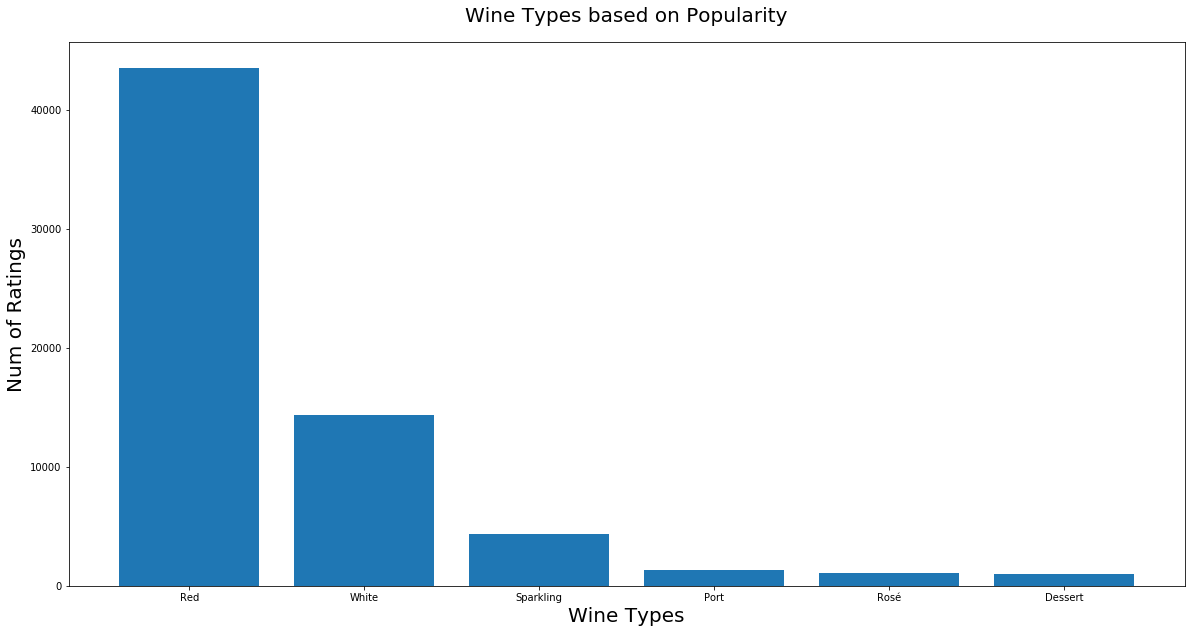

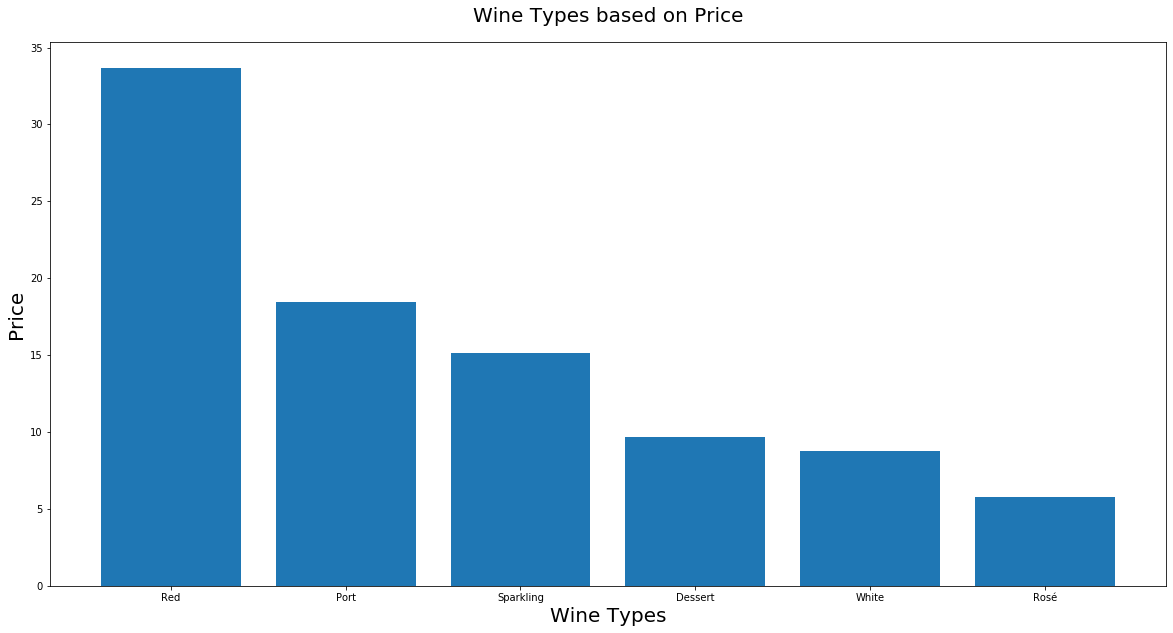

In [10]:
wine.plot_type_based_on_popularity()

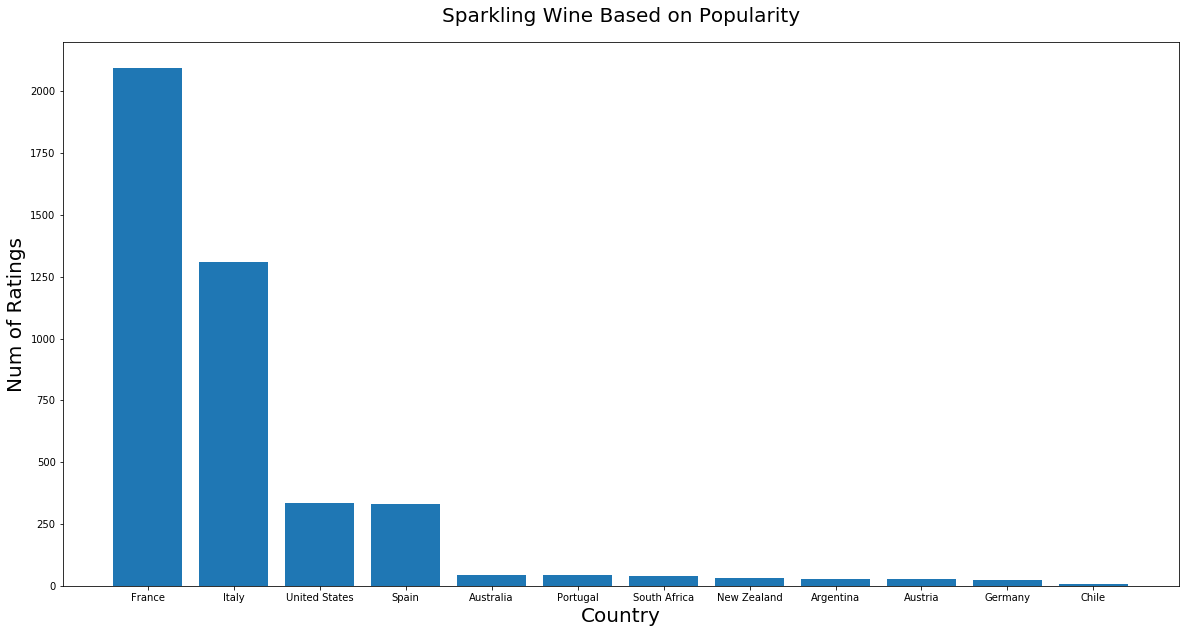

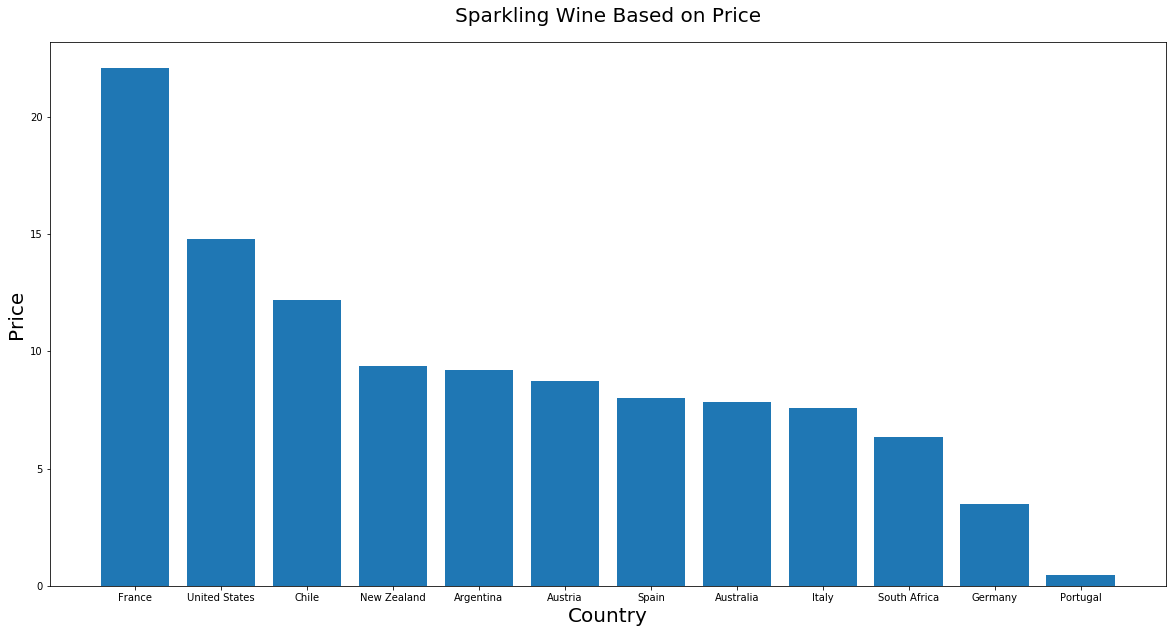

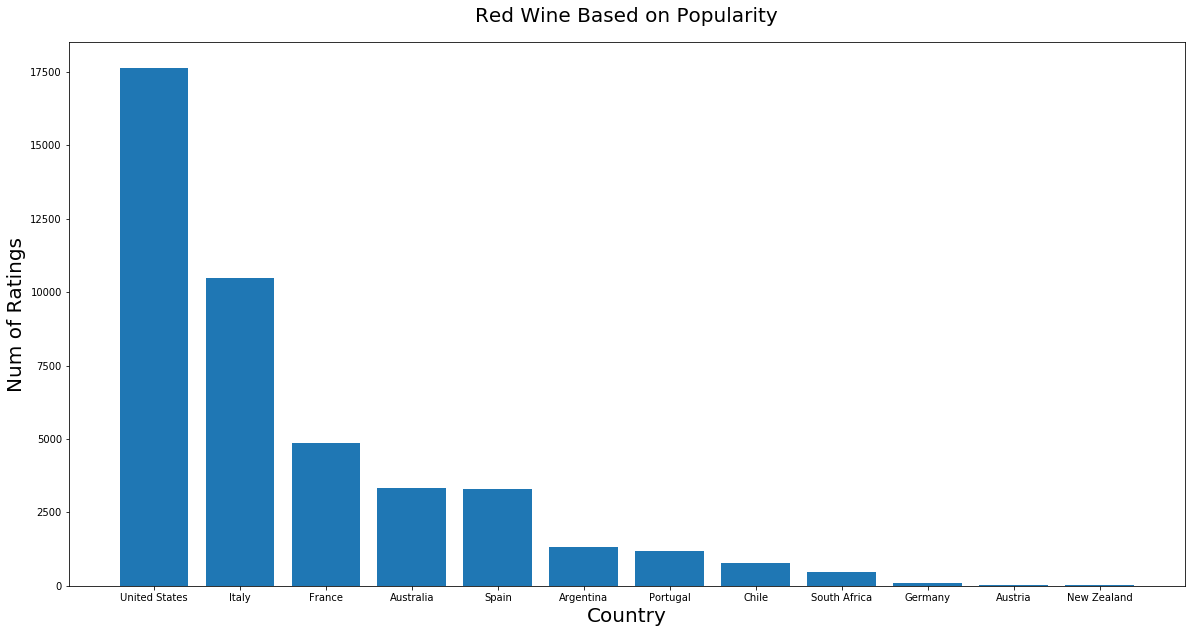

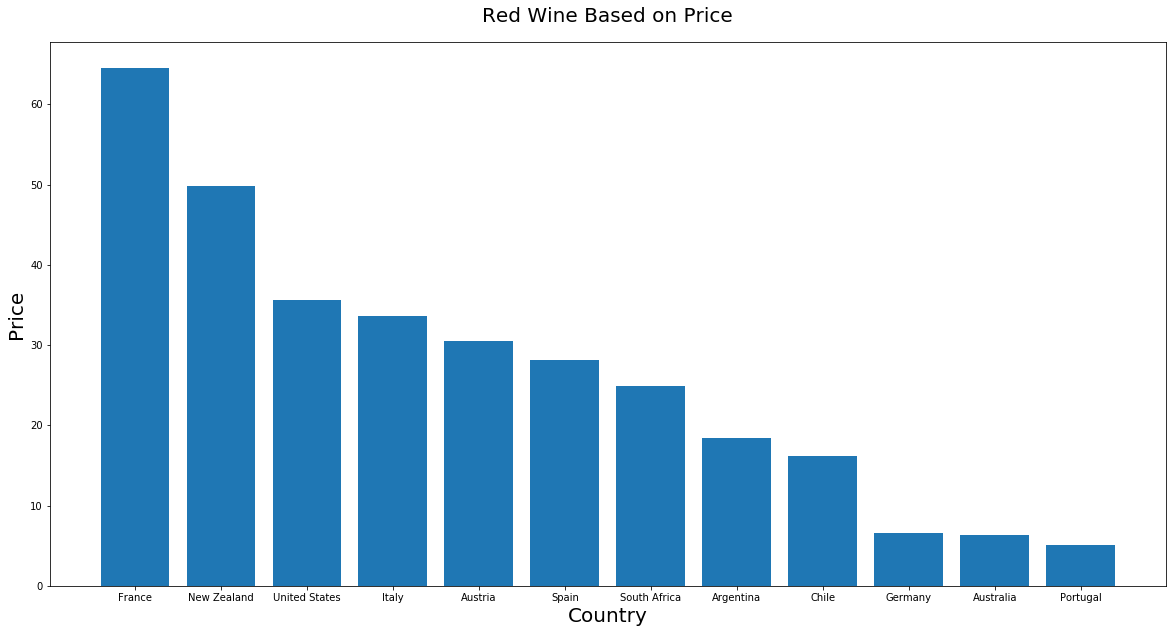

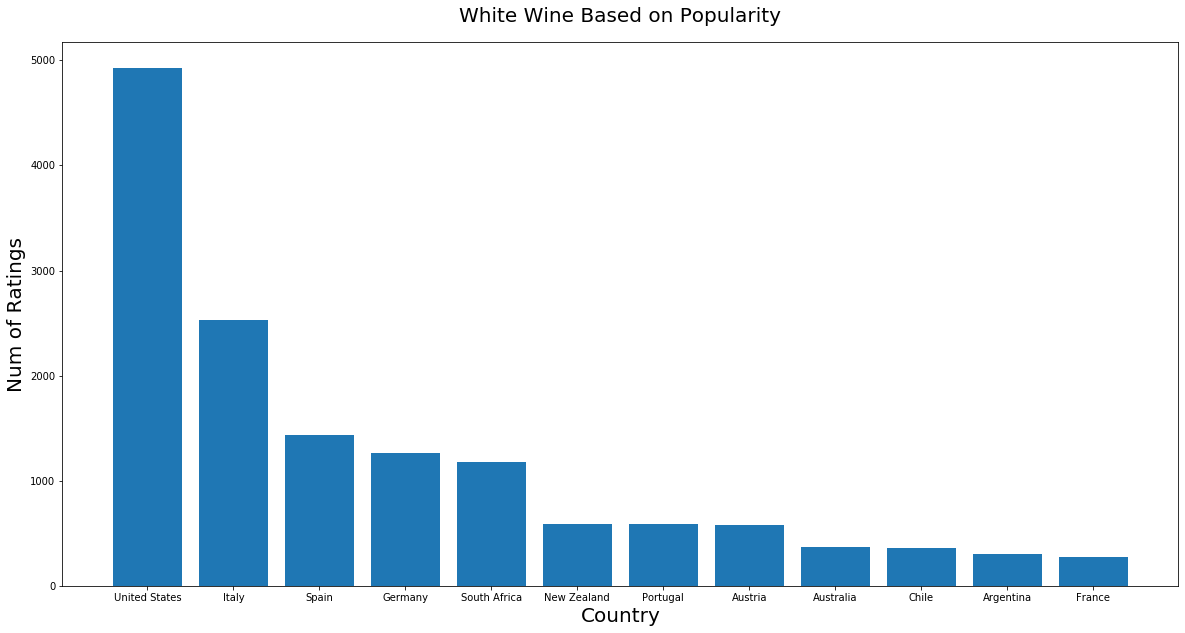

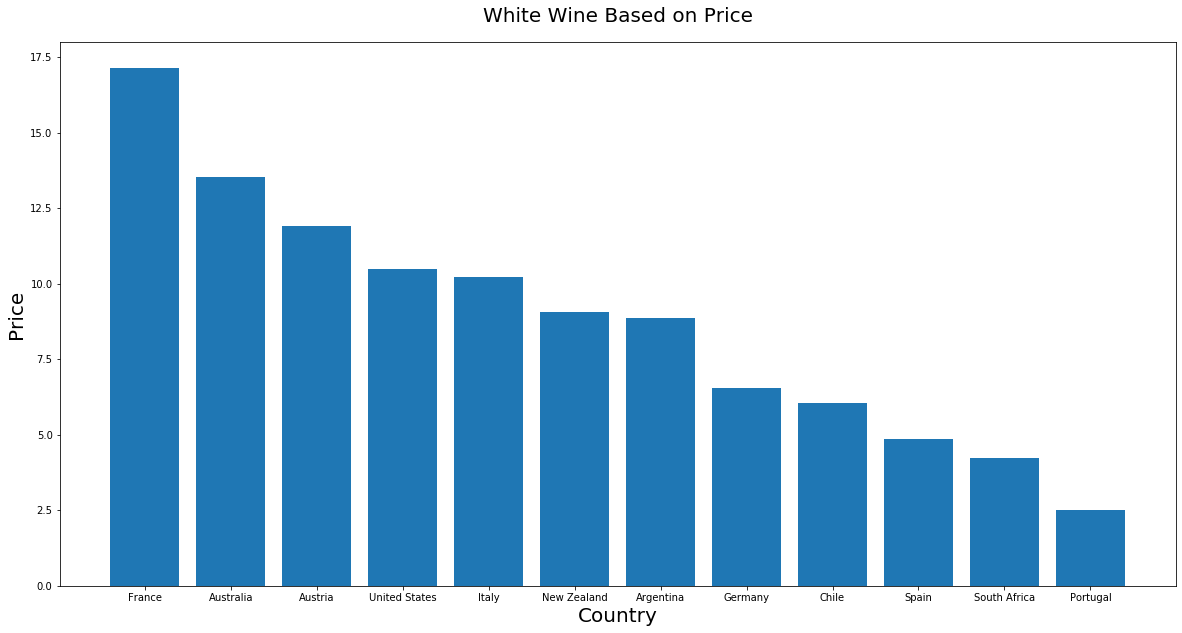

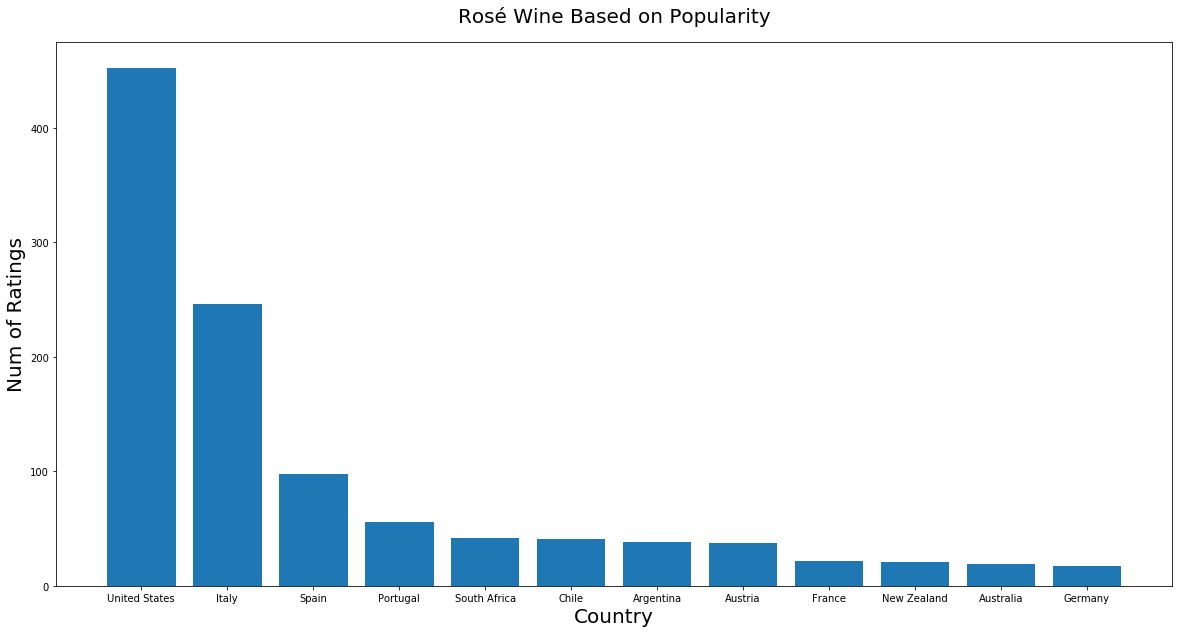

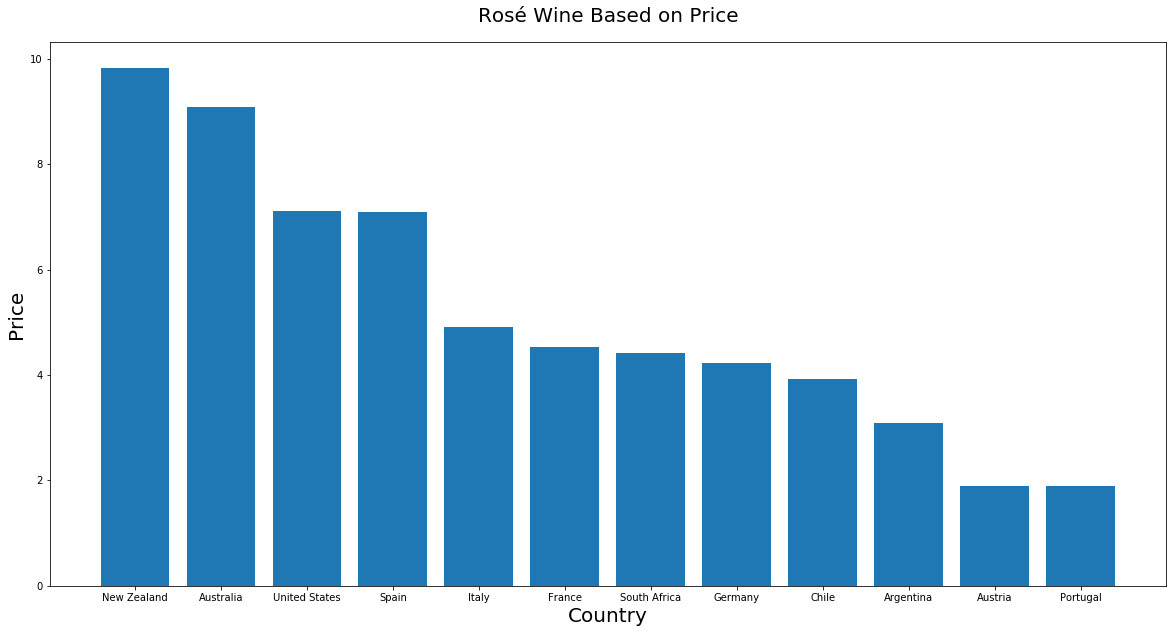

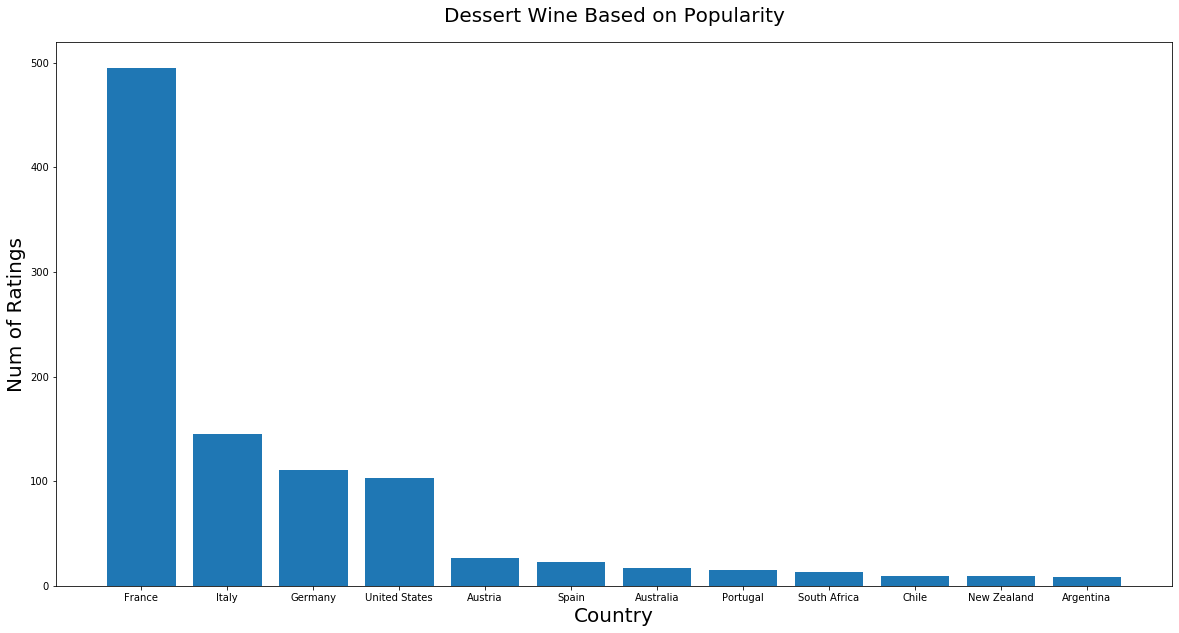

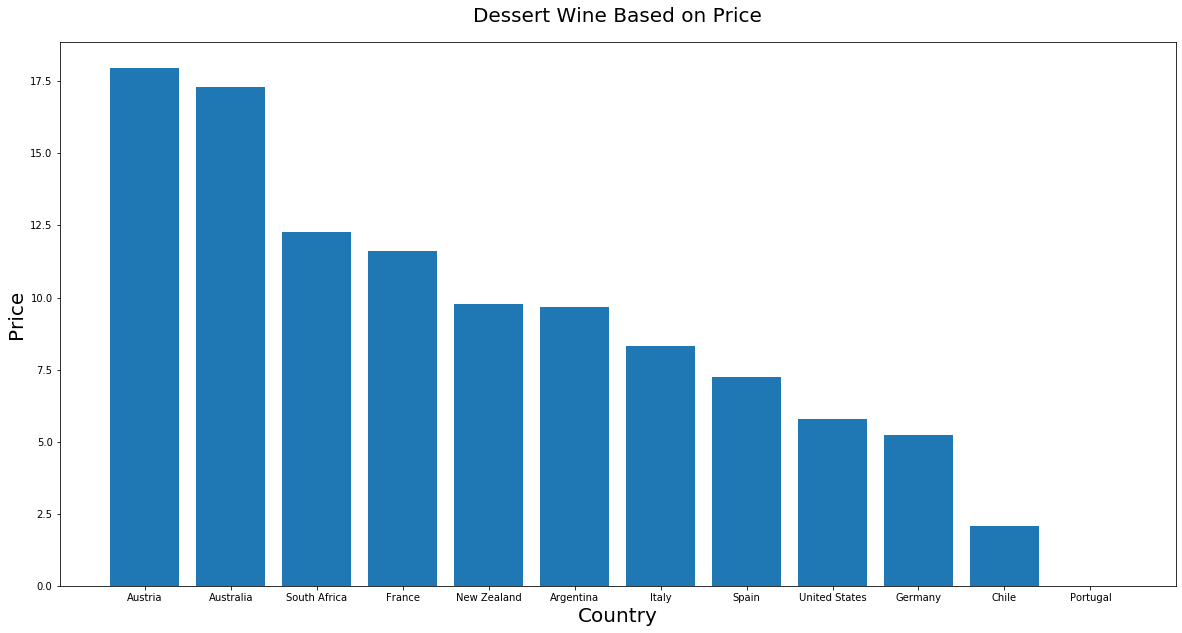

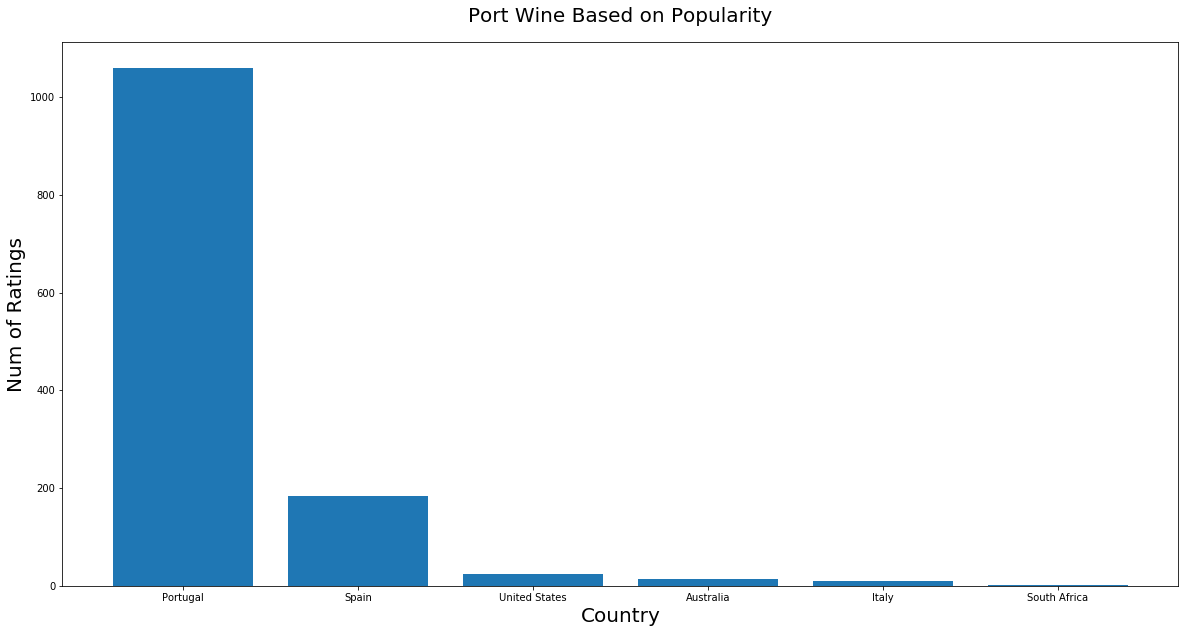

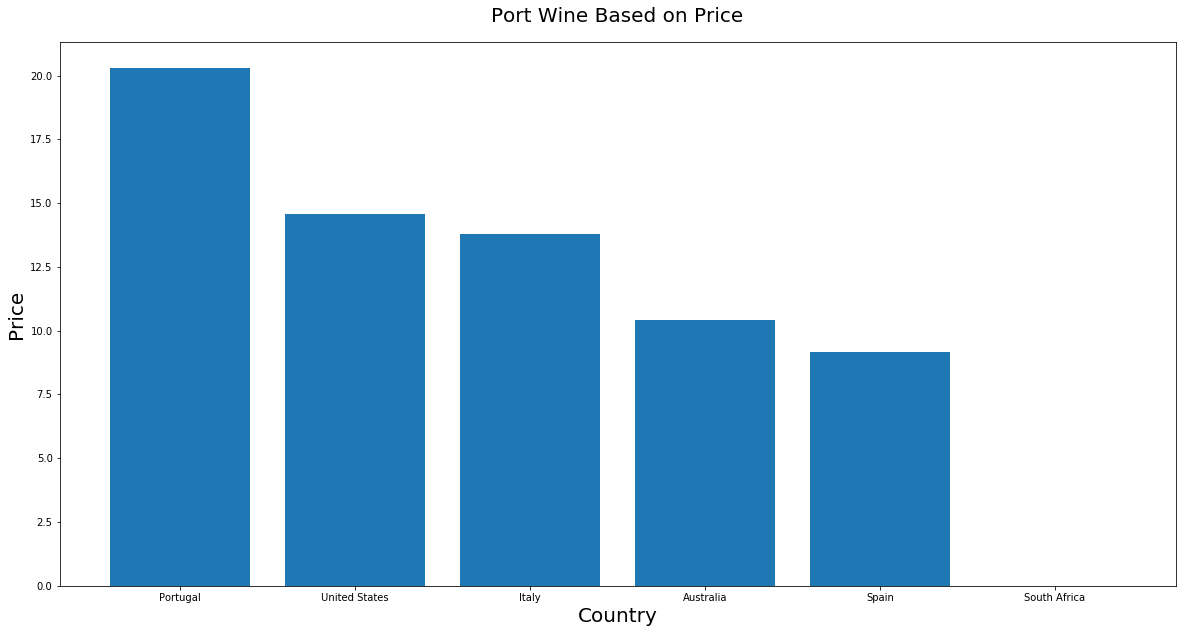

In [11]:
wine.country_rating_plot()

In [12]:
us_df = wine.get_us_wines()

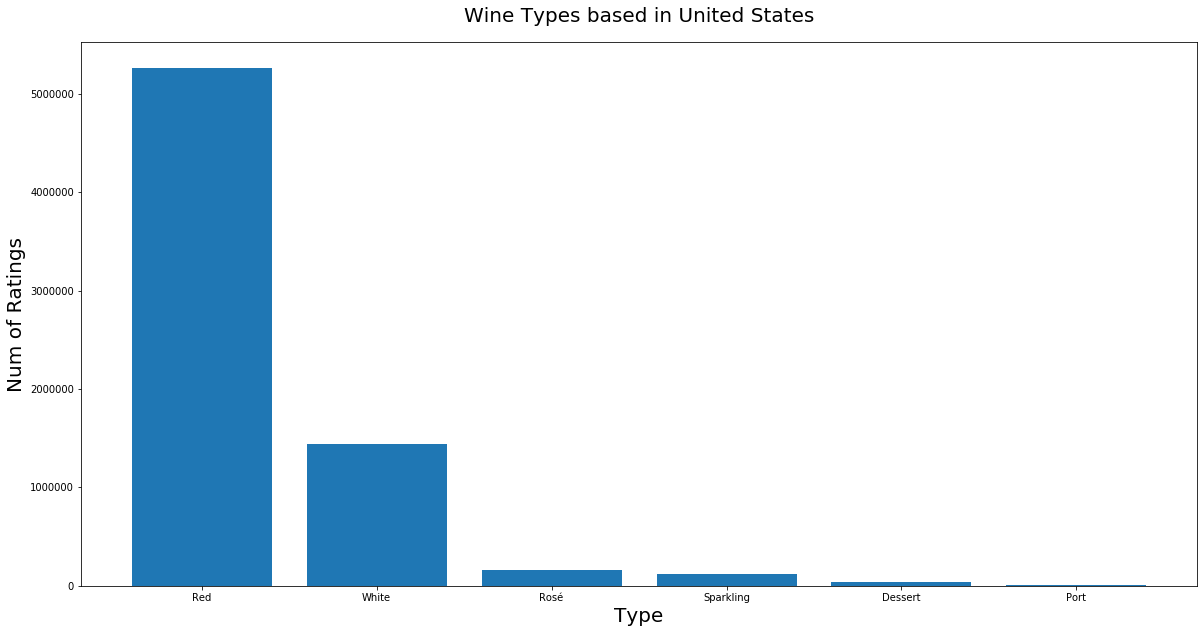

In [13]:
wine.plot_us_type_wine(us_df)

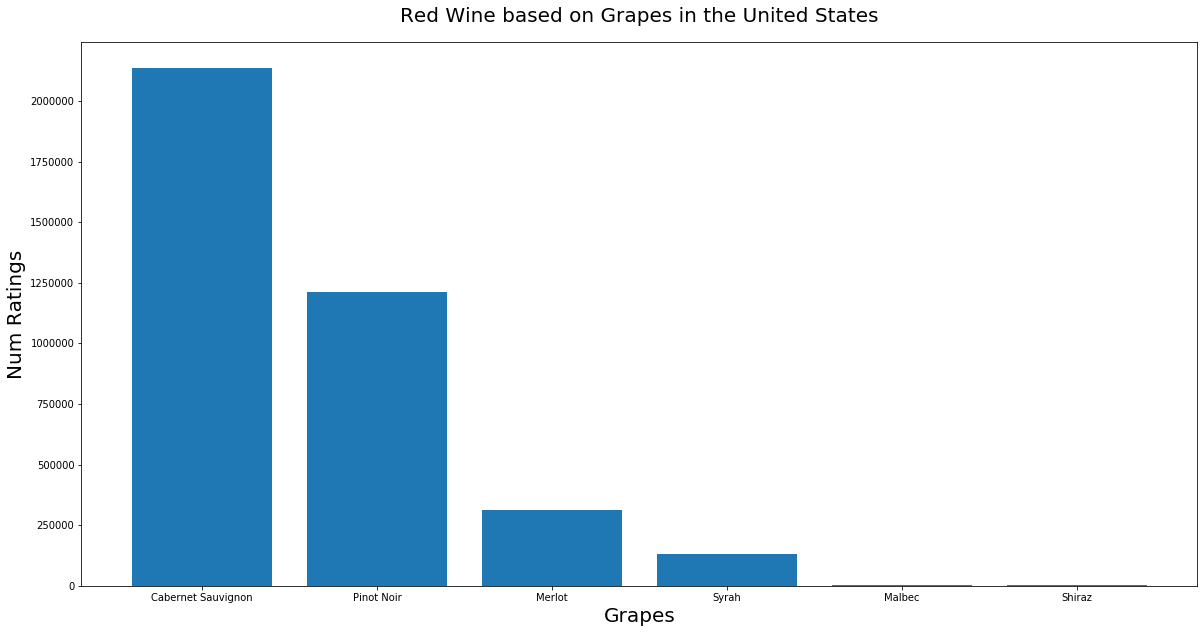

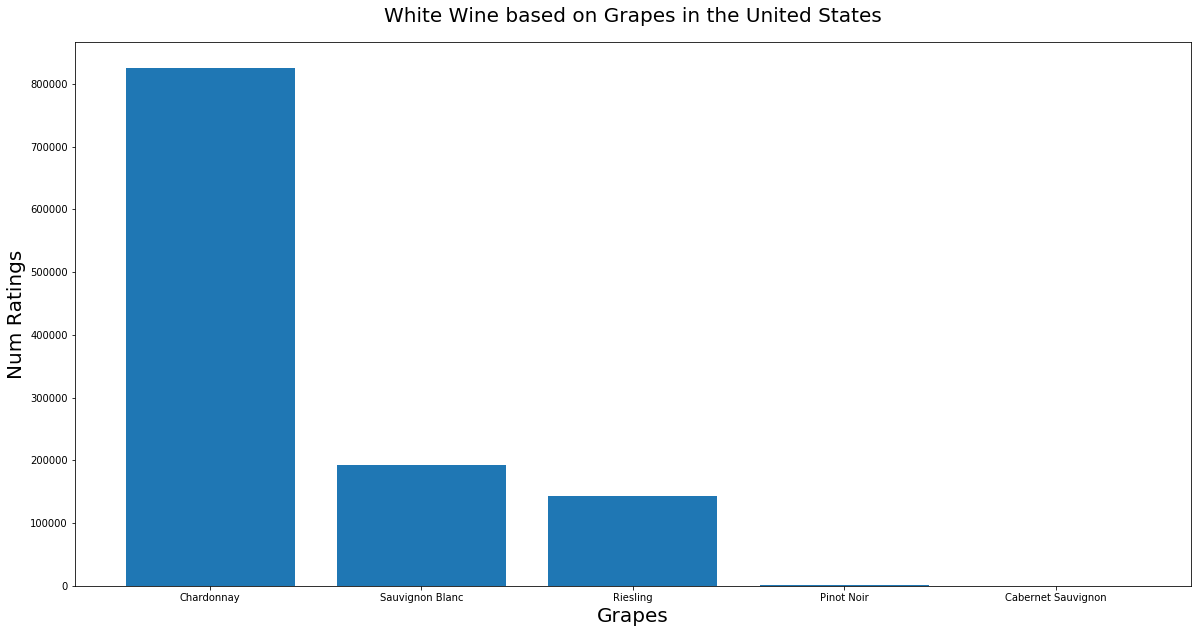

In [14]:
wine.plot_red_white_us_wine(us_df)

In [92]:
type_dummies = wine.get_dummies('type').dummies
country_dummies = wine.get_dummies('country').dummies
grape_dummies = wine.get_dummies('grapes').dummies

In [93]:
final_dummy = wine.combine_dummies(type_dummies, country_dummies, grape_dummies)
final_dummy
# import pandas as pd
# shorten_df = wine_df.drop(columns=['location', 'region', 'image_url', 'reviews'])
# l = [type_dummies, country_dummies]
# for a in l:
#     shorten_df = pd.concat([shorten_df, a], axis=1)

# shorten_df

,id,title,country,price,type,ratings,num_ratings,vintage,grapes,Dessert,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
0,5e34c6e0ac2e8d38fb91773e,J. Schram Brut 2008,United States,99.00,Sparkling,4.5,191,2008.0,None,0,...,1,0,0,0,0,0,0,0,0,0
1,5e34c6e0ac2e8d38fb91773f,Carneros Cuvée 2005,United States,95.99,Sparkling,4.5,66,2005.0,None,0,...,1,0,0,0,0,0,0,0,0,0
2,5e34c6e0ac2e8d38fb917740,Carneros Cuvée 2004,United States,69.99,Sparkling,4.4,86,2004.0,None,0,...,1,0,0,0,0,0,0,0,0,0
3,5e34c6e0ac2e8d38fb917741,Brut Cuvée 2013,United States,58.99,Sparkling,4.4,31,2013.0,None,0,...,1,0,0,0,0,0,0,0,0,0
4,5e34c6e0ac2e8d38fb917742,Sea Spray Blanc de Noirs 2011,United States,89.99,Sparkling,4.3,99,2011.0,None,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,5e36df9d02148f7129b7687c,Poggio Al Tufo Rompicollo 2016,Italy,14.82,Red,3.9,479,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
65409,5e36df9d02148f7129b7687d,Rosso di Montalcino 2016,Italy,24.71,Red,3.9,481,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
65410,5e36df9d02148f7129b7687e,Torroja 2016,Spain,49.44,Red,3.9,495,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
65411,5e36df9d02148f7129b7687f,Chianti Classico 2016,Italy,24.71,Red,3.9,503,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# price_not_null = final_dummy[final_dummy['price'] > 0.0]
# group_price = price_not_null.groupby(['type', 'country']).agg({'price': 'mean'}).reset_index()
# group_price

,type,country,price
0,Dessert,Argentina,19.372500
1,Dessert,Australia,32.664444
2,Dessert,Austria,48.486000
3,Dessert,Chile,18.780000
4,Dessert,France,66.835581
...,...,...,...
59,White,New Zealand,19.518022
60,White,Portugal,17.080581
61,White,South Africa,26.336383
62,White,Spain,23.896212


In [37]:
# for idx, row in group_price.iterrows():
#     final_dummy.loc[((final_dummy['price'] == 0.0) & (final_dummy['type'] == row['type']) & (final_dummy['country'] == row['country'])), 'price'] = row['price']

In [84]:
final_dummy[(final_dummy['price'] == 0.0) & (final_dummy['country'] == 'Spain')]

,id,title,country,price,type,ratings,num_ratings,vintage,grapes,Dessert,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
41014,5e3651d23a07a50b4f0d0cf3,No. 3 Old Vines 2005,Spain,0.0,Dessert,4.6,26,2005.0,None,1,...,0,0,0,0,0,0,0,0,0,0
41016,5e3651d23a07a50b4f0d0cf5,No. 3 Old Vines N.V.,Spain,0.0,Dessert,4.5,157,0.0,None,1,...,0,0,0,0,0,0,0,0,0,0
41036,5e3651d23a07a50b4f0d0d09,No. 2 Victoria 2014,Spain,0.0,Dessert,4.3,280,2014.0,None,1,...,0,0,0,0,0,0,0,0,0,0
41037,5e3651d23a07a50b4f0d0d0a,No. 2 Victoria 2012,Spain,0.0,Dessert,4.3,174,2012.0,None,1,...,0,0,0,0,0,0,0,0,0,0
41050,5e3651d23a07a50b4f0d0d17,No. 2 Victoria 2011,Spain,0.0,Dessert,4.3,76,2011.0,None,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51249,5e366ddd806d98ee68035594,A Teixa Ribeiro 2013,Spain,0.0,White,4.2,76,2013.0,None,0,...,0,0,0,0,0,0,0,0,0,0
51252,5e366ddd806d98ee68035597,Masia Carreras Empordà Blanco 2016,Spain,0.0,White,4.2,84,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
51255,5e366ddd806d98ee6803559a,Impro-Visació Vinyes de Xarel-lo 2016,Spain,0.0,White,4.2,89,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
51258,5e366ddd806d98ee6803559d,Branco de Santa Cruz 2015,Spain,0.0,White,4.2,96,2015.0,None,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
train_data = final_dummy[(final_dummy['price'] > 0.0) & (final_dummy['vintage'] > 0.0)]
empty_data = final_dummy[(final_dummy['price'] == 0.0) & (final_dummy['vintage'] == 0.0)]
X = train_data.drop(columns=['price', 'type', 'grapes', 'id', 'title', 'country'])
y = train_data['price']
X

,ratings,num_ratings,vintage,Dessert,Port,Red,Rosé,Sparkling,White,Argentina,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
0,4.5,191,2008.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4.5,66,2005.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4.4,86,2004.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.4,31,2013.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4.3,99,2011.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,3.9,479,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65409,3.9,481,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65410,3.9,495,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65411,3.9,503,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,ratings,num_ratings,vintage,Dessert,Port,Red,Rosé,Sparkling,White,Argentina,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
29493,3.9,1491,2016.0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
58419,3.9,439,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22224,4.1,89,2010.0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
25436,4.1,99,2015.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57249,3.9,477,2018.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26168,4.1,87,2011.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
14663,4.1,87,2017.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
20118,4.1,87,2014.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1888,3.9,38,2018.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [163]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib
import matplotlib.pyplot as plt

X_lr = X_train[['vintage', 'ratings']]
X_lr2 = train_data['ratings'] + train_data['vintage']

simple_model = sm.OLS(y_train, X_lr)
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                          4.133e+04
Date:                Wed, 05 Feb 2020   Prob (F-statistic):                        0.00
Time:                        12:03:03   Log-Likelihood:                     -1.1245e+05
No. Observations:               24345   AIC:                                  2.249e+05
Df Residuals:                   24343   BIC:                                  2.249e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vintage       -0.1887      0.002   -110.313      0.000      -0.192      -0.185
ratings      105.0743      0.859    122.310      0.000     103.390     106.758
==============================================================================
Omnibus:                    11251.645   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85187.018
Skew:                           2.078   Prob(JB):                         0.00
Kurtosis:                      11.168   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
simple_results.params[0]

-0.1887358530371347

In [167]:
# Equation: price = -0.188736 * vintage + 105.074*ratings

y_lr_pred = []
vin_beta = simple_results.params[0]
ratings_beta = simple_results.params[1]

for idx, row in X_test.iterrows():
    res = vin_beta * row['vintage'] + ratings_beta * row['ratings']
    y_lr_pred.append(res)

[60.63186457946057,
 50.50190580564521,
 29.67578069890328,
 50.31316995260812,
 50.124434099570976,
 29.29830899282905,
 50.50190580564521,
 29.29830899282905,
 51.256849217793786,
 50.69064165868235,
 29.487044845866137,
 51.44558507083093,
 50.31316995260812,
 50.50190580564521,
 39.428267766644296,
 29.487044845866137,
 29.67578069890328,
 51.256849217793786,
 50.31316995260812,
 29.864516551940426,
 50.124434099570976,
 29.29830899282905,
 50.50190580564521,
 51.44558507083093,
 28.92083728675476,
 50.124434099570976,
 50.31316995260812,
 40.37194703182996,
 50.8793775117195,
 93.28657113735204,
 50.31316995260812,
 50.124434099570976,
 29.29830899282905,
 81.83546139227684,
 51.44558507083093,
 71.51676676542434,
 50.124434099570976,
 29.864516551940426,
 -12.92014877976635,
 92.90909943127775,
 29.864516551940426,
 50.50190580564521,
 50.50190580564521,
 39.61700361968144,
 50.124434099570976,
 50.31316995260812,
 8.47218388608701,
 71.1392950593501,
 29.67578069890328,
 51.4455

In [168]:
calculate_rmse_grad_boost(y_test, y_lr_pred)

25.024018610775574

In [138]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,ratings,num_ratings,vintage,Dessert,Port,Red,Rosé,Sparkling,White,Argentina,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
29493,3.9,1491,2016.0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
58419,3.9,439,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22224,4.1,89,2010.0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
25436,4.1,99,2015.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57249,3.9,477,2018.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26168,4.1,87,2011.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
14663,4.1,87,2017.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
20118,4.1,87,2014.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1888,3.9,38,2018.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [98]:
def calculate_rmse(y):
    mean = y.mean()
    count = 0
    
    for ele in y:
        count += (ele - mean)**2
    
    return (count/len(y))**(1/2)

calculate_rmse(y_test)

31.47090855966222

In [99]:
rf = RandomForestRegressor(n_estimators=1000,
                           max_features='auto',
                           random_state=0)
rf.fit(X_train, y_train)
                                     
# Test Prediction
pred = rf.predict(X_test)
# print(f"R2 score = {r2_score(y_test, rf.predict(X_test))}")
print(f"accuracy = {rf.score(X_test, y_test)}")

accuracy = 0.8065744714989938


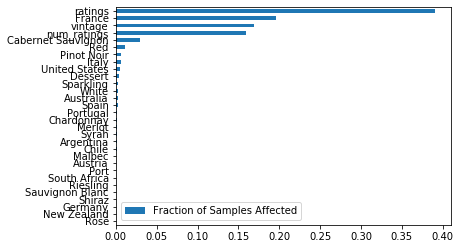

In [100]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

In [101]:
from sklearn.metrics import mean_squared_error

count = 0

for idx, ele in enumerate(y_test):
    count += (ele - pred[idx])**2
    
(count/len(y_test))**(1/2)

13.840958841007119

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


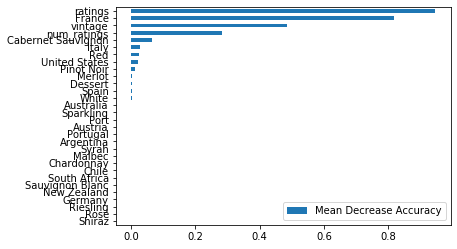

In [183]:
from sklearn.metrics import r2_score
from collections import defaultdict

from sklearn.model_selection import ShuffleSplit

rf = RandomForestRegressor()
scores = defaultdict(list)

columns = X.columns
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    rf.fit(X_train, y_train)
    acc = r2_score(y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rf.predict(X_t))
        scores[columns[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh')

In [102]:
X2 = train_data[['ratings', 'France', 'num_ratings', 'vintage', 'Cabernet Sauvignon', 'Red']]
y2 = train_data['price']

In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)
rf2 = RandomForestRegressor(n_estimators=1000,
                           max_features='auto',
                           random_state=0)
rf2.fit(X_train2, y_train2)
                                     
# Test Prediction
pred2 = rf2.predict(X_test2)
# print(f"R2 score = {r2_score(y_test, rf.predict(X_test))}")
print(f"accuracy = {rf2.score(X_test2, y_test2)}")

accuracy = 0.7827742154877046


In [104]:
y_thresh = train_data['price'].apply(lambda x: 0 if x <= 125 else 1)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

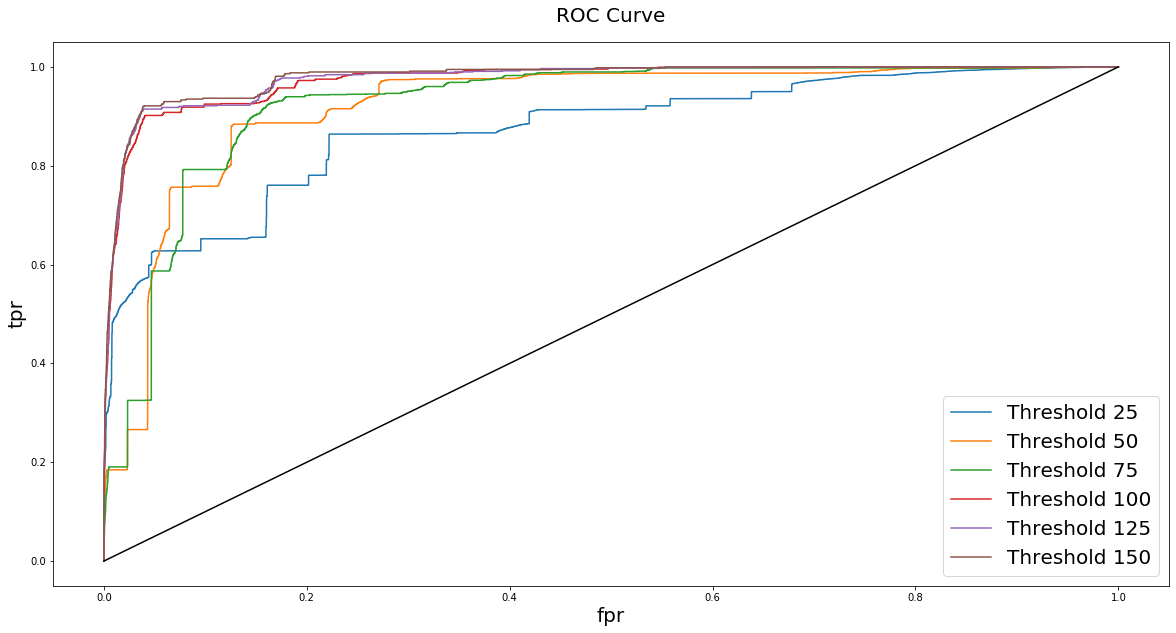

In [177]:
from sklearn.linear_model import LogisticRegression, LinearRegression

fig, ax = plt.subplots(figsize=(20,10))
df_roc = []

thresh = [25, 50, 75, 100, 125, 150]
# plot_roc(ax, df)
def get_roc(thresh):
    for t in thresh:
        model = LogisticRegression(C=1000)
        y_thresh = train_data['price'].apply(lambda x: 0 if x <= t else 1)
        model.fit(X, y_thresh)
        df_roc.append(calculate_threshold_values(model.predict_proba(X)[:,1], y_thresh))
        
    return df_roc

def plot_roc_curve(df_roc):
    for idx, df in enumerate(df_roc):
        plot_roc(ax, df, label="Threshold {}".format(thresh[idx]))
    ax.plot([0,1],[0,1], 'k', label="random")

df_roc = get_roc(thresh)
plot_roc_curve(df_roc)


In [119]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df, label='ROC'):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label=label)
#     ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr', fontsize=20)
    ax.set_ylabel('tpr', fontsize=20)
    ax.set_title('ROC Curve', fontsize=20, pad=20)
    ax.legend(fontsize=20)
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

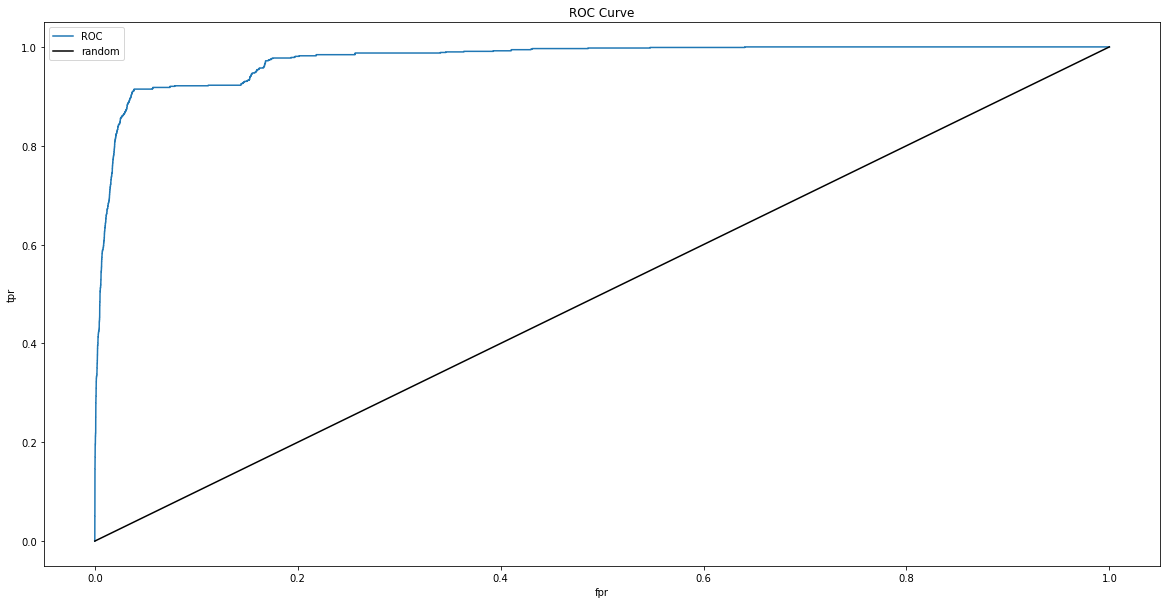

In [107]:
fig, ax = plt.subplots(figsize=(20,10))
df = calculate_threshold_values(model.predict_proba(X)[:,1], y_thresh)
plot_roc(ax, df)
# plot_precision_recall(ax1, df)

In [139]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)

In [141]:
N_ESTIMATORS = 500 # used later in model fitting
# Fit a gradient boosted regressor to this function 
#     and plot both the functiona and f
model = GradientBoostingRegressor(learning_rate=0.2, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
def calculate_rmse_grad_boost(y_test, y_pred):
    count = 0

    for idx, ele in enumerate(y_test):
        count += (ele - y_pred[idx])**2

    return (count/len(y_test))**(1/2)

Text(0, 0.5, 'RMSE')

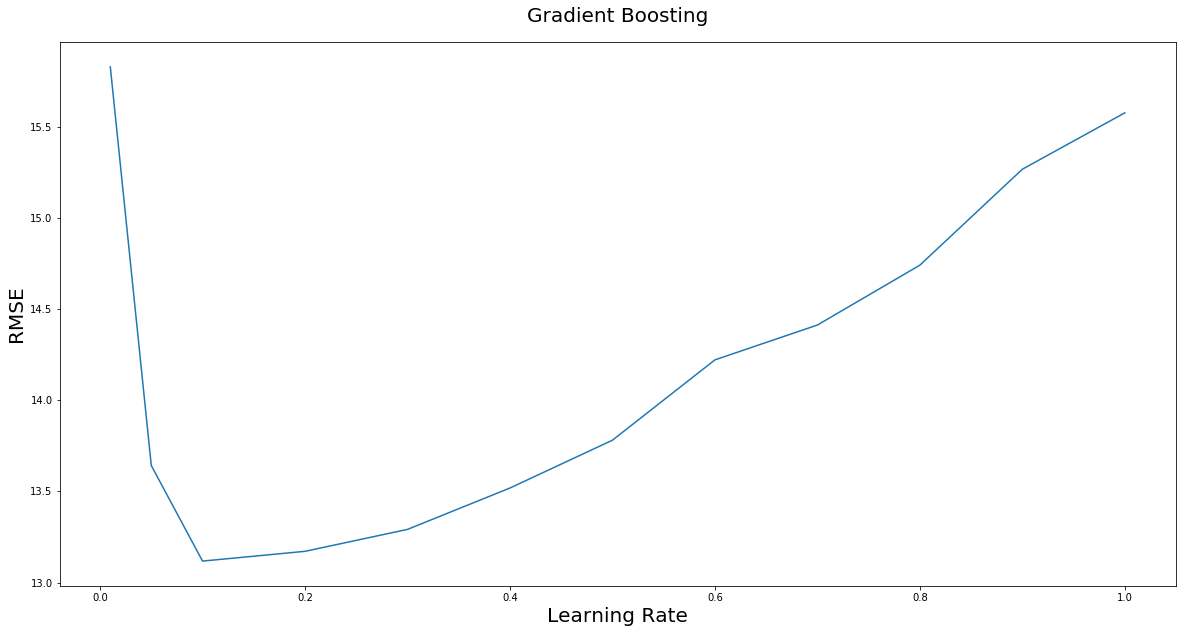

In [149]:
fig, ax = plt.subplots(figsize=[20, 10])

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
rmse = []
for lr in learning_rates:
    model = GradientBoostingRegressor(learning_rate=lr, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse.append(calculate_rmse_grad_boost(y_test, y_pred))
ax.plot(learning_rates, rmse)
ax.set_title('Gradient Boosting', fontsize=20, pad=20)
ax.set_xlabel('Learning Rate', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)

In [148]:
rmse

[15.829381093825441,
 13.640687119074986,
 13.1226097255208,
 13.171750117898894,
 13.318227504706773,
 13.538318170139311,
 13.793801377675223,
 14.220969415677532,
 14.447192263324247,
 14.779189387615913,
 15.238048664448135,
 15.59622411630546]

In [144]:
N_ESTIMATORS = 500 # used later in model fitting
# Fit a gradient boosted regressor to this function 
#     and plot both the functiona and f
clf = GradientBoostingRegressor(learning_rate=0.1, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [145]:
y_pred = model.predict(X_test)

In [147]:
calculate_rmse_grad_boost(y_test, y_pred)

15.59622411630546

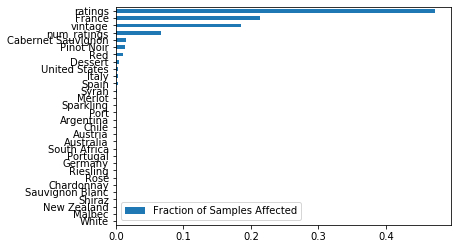

In [150]:
feat_scores_xgboost = pd.DataFrame({'Fraction of Samples Affected' : clf.feature_importances_},
                           index=X.columns)
feat_scores_xgboost = feat_scores_xgboost.sort_values(by='Fraction of Samples Affected')
feat_scores_xgboost.plot(kind='barh')

In [ ]:
real_X = empty_data.drop(columns=['price', 'type', 'grapes', 'id', 'title', 'country', 'y_thresh'])
real_pred = rf.predict(real_X)

In [ ]:
# empty_data

In [ ]:
# for idx, row in empty_data.iterrows():
#     empty_data.loc[idx, 'price'] = real_pred[idx]